In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

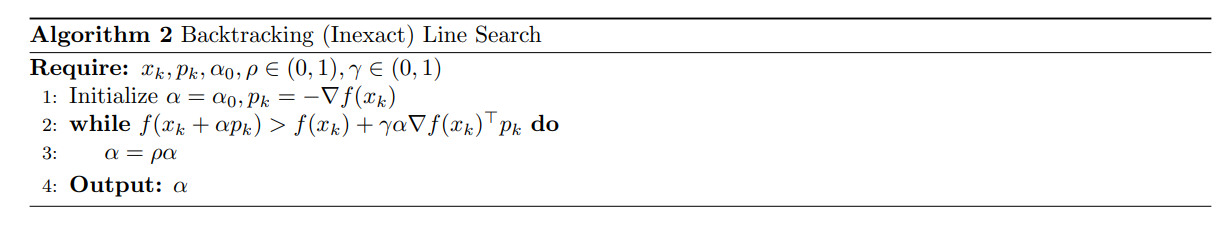

## Part 1

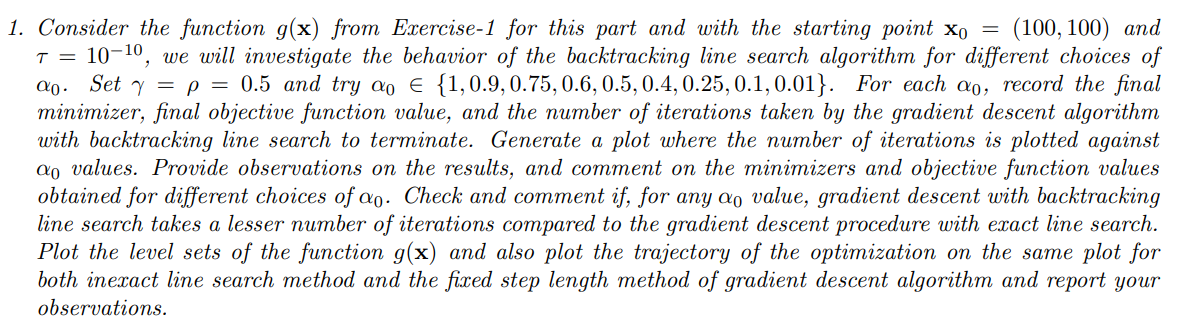

$g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2$

In [2]:
def gradg(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-2*(x1+49), -2*(x2-36)])

def gx(xk):
  x1  = xk[0]
  x2 = xk[1]
  return (x1 + 49)**2 + (x2-36)**2

def alphaout(xk, pk, alpha0, rho, gamma):
  alpha = alpha0
  pk = gradg(xk)
  while gx(xk + alpha*pk) > (gx(xk) - gamma*alpha*gradg(xk)@pk):
    alpha = rho*alpha
  return alpha


tau=10**(-10)
x0 = np.array([100,100])


gamma = 0.5
rho = 0.5

alphas= [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

iterations = []
minimizerstore = []
minimumstore = []

for alpha0 in alphas:
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  alpha = alpha0
  while norm(pk)>tau:
    alpha =  alphaout(xk, pk, alpha, rho, gamma)
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1

  iterations.append(count)
  minimizerstore.append(xk)
  minimumstore.append(gx(xk))

In [3]:
iterations

[1, 13, 21, 32, 1, 18, 42, 130, 1426]

In [4]:
print(minimizerstore)

[array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.])]


In [5]:
minimumstore

[0.0,
 2.629978954295262e-22,
 1.3595230355191855e-21,
 8.948165620682675e-22,
 0.0,
 1.8070003829032932e-21,
 1.3595230355191855e-21,
 1.672152121111579e-21,
 2.4913093745480103e-21]

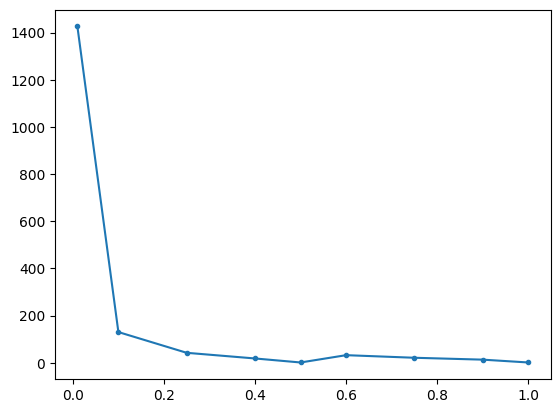

In [6]:
plt.plot(alphas, iterations, marker = 'o', markersize = 3)

For different choices of $\alpha_0$ we see that for $\alpha = 1, 0.5$ the number of iterations are 1, that's because for $\alpha = 0.5$ becomes the optimal exact line search $\alpha$, but if we input 1 in the new alpha calculator that also becomes 0.5 after inexact search, so it results in both of them taking only 1 iteration. As we keep decreasing $\alpha$ after 0.5 the iterations keep increasing.

As for the minimizer (-49, 36) is achieved for all $\alpha_0$ and minimum objective function values is 0 or very close to 0.

Comparing with exact line search we see that, when we used exact line search the total iterations were all 1, here for  $\alpha_0 = 1, 0.5$ we get 1, but for all other cases it is greater than 1. Hence, #iterations(Inexact line search)$\geq$ #Iterations(Exact line search).

### Level Curves for g(x) and trajactery for inexact and Fixed

Current Alpha:  0.9


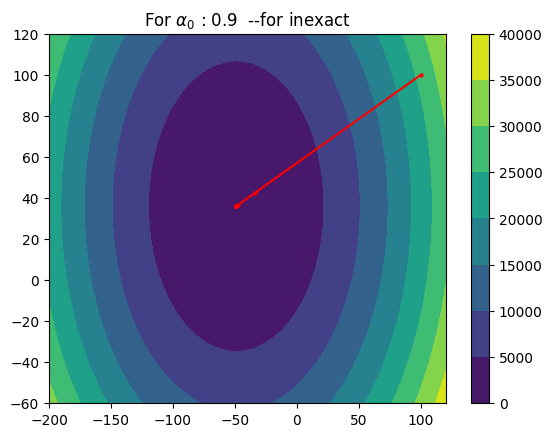

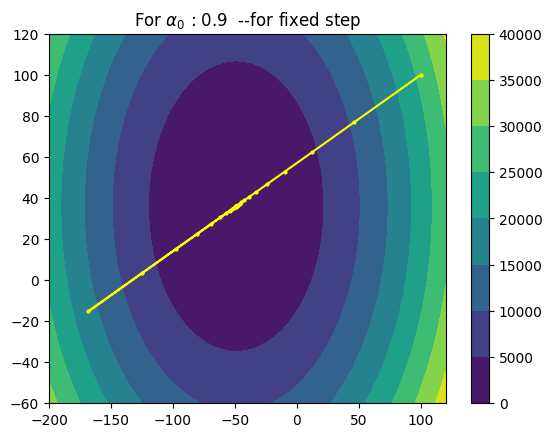

Current Alpha:  0.75


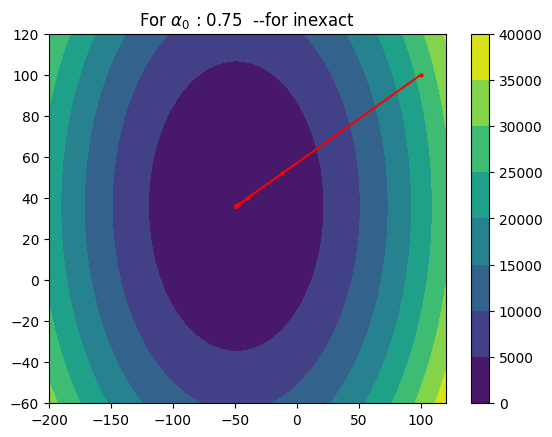

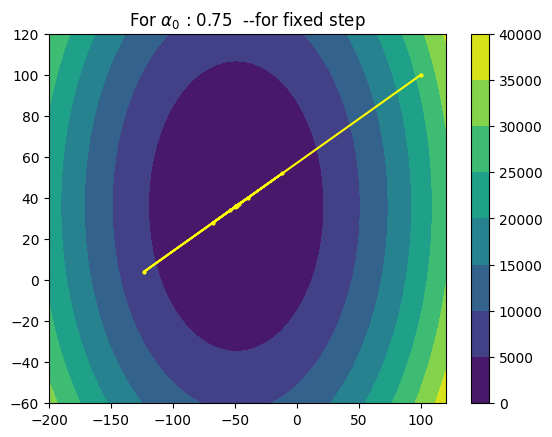

Current Alpha:  0.6


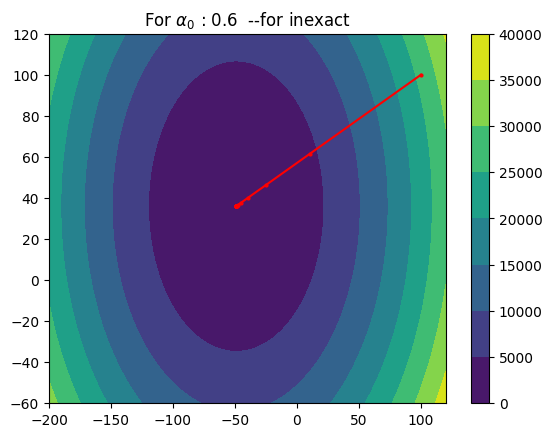

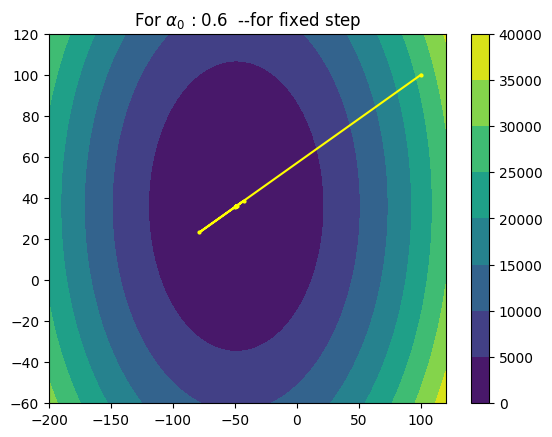

Current Alpha:  0.5


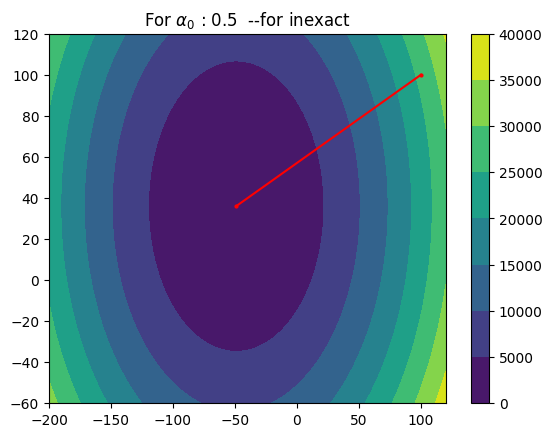

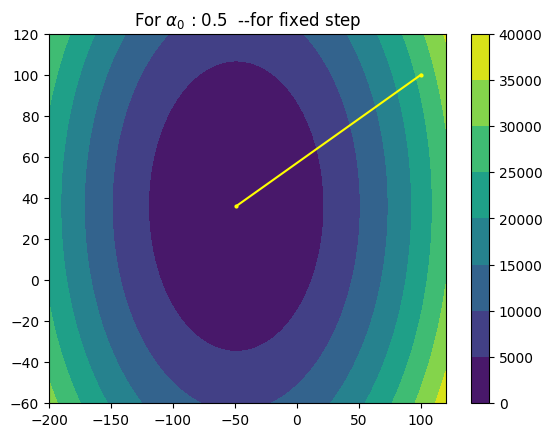

Current Alpha:  0.4


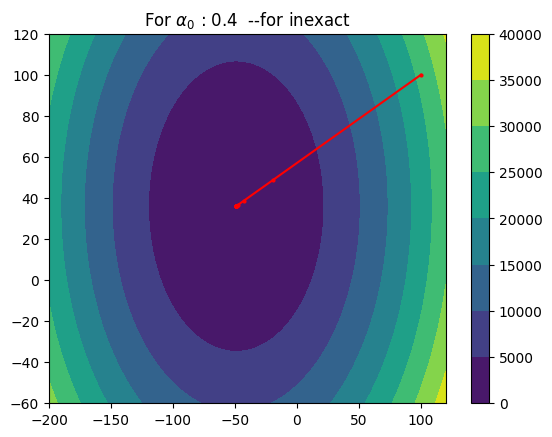

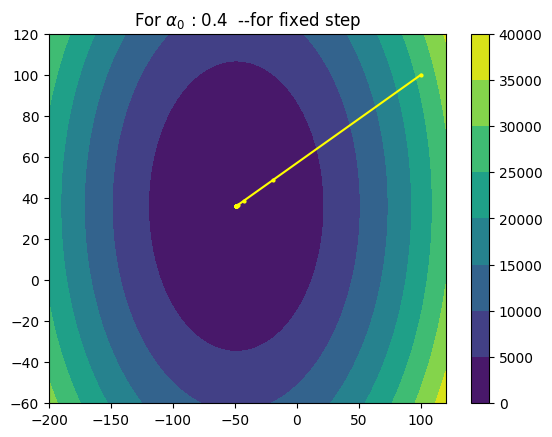

Current Alpha:  0.25


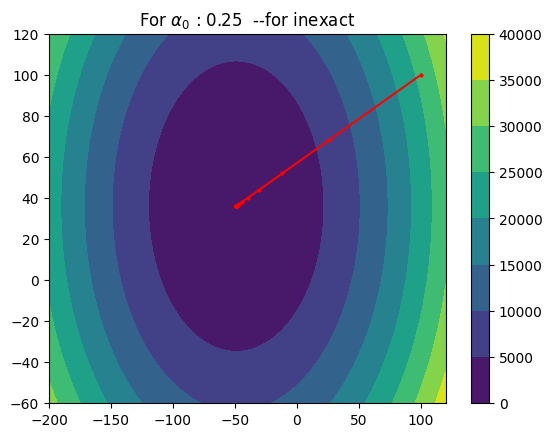

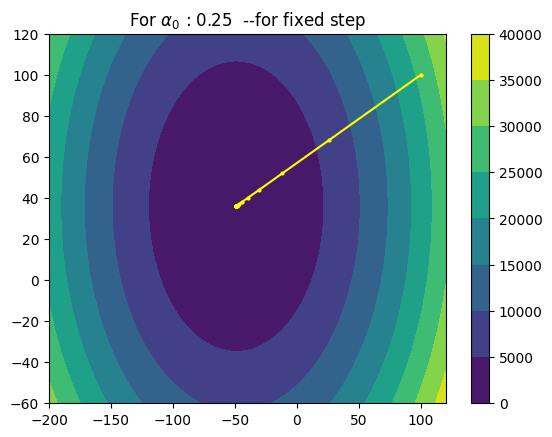

Current Alpha:  0.1


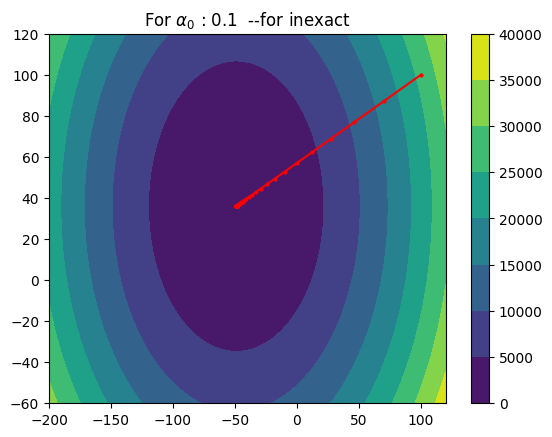

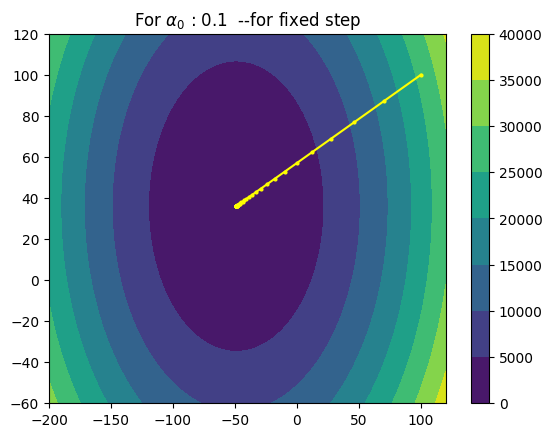

Current Alpha:  0.01


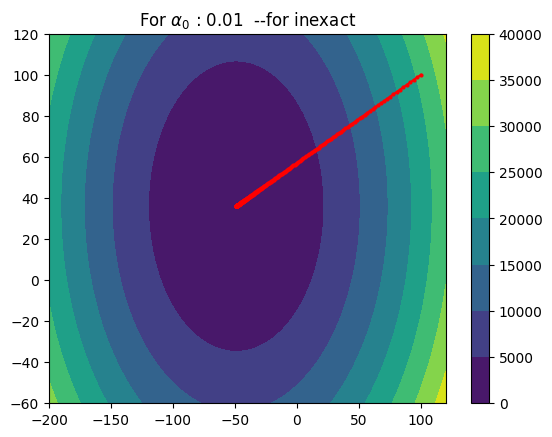

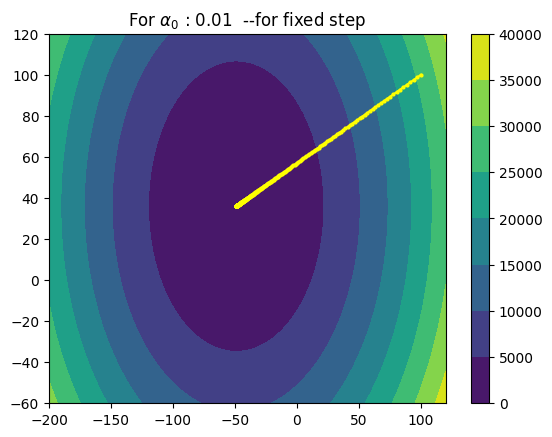

In [7]:
tau=10**(-10)
x0 = np.array([100,100])


gamma = 0.5
rho = 0.5

alphas= [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

for alpha0 in alphas:
  print("Current Alpha: ", alpha0)

  #trajactory for inexact
  x = np.linspace(-200, 120, 1000)
  y = np.linspace(-60, 120, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx((X,Y))
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  plt.title(r"For $ \alpha_0 $ : " + str(alpha0)+"  --for inexact")
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  alpha = alpha0
  xcordinates = []
  ycordinates = []
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])
  while norm(pk)>tau:
    alpha =  alphaout(xk, pk, alpha, rho, gamma)
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2, label="In-Exact")
  plt.show()

  #trajactory for exact
  x = np.linspace(-200, 120, 1000)
  y = np.linspace(-60, 120, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx((X,Y))
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  plt.title(r"For $ \alpha_0 $ : " + str(alpha0) + "  --for fixed step")
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  alpha = alpha0
  xcordinates = []
  ycordinates = []
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])
  while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="yellow", markersize = 2, label="Fixed")
  plt.show()

Observing above plots we see that for large alpha values, the fixed step method overshoots and goes beyond the minimizer and then slowly comes back to optimality, while inexact though not perfect goes towards the minimizer appropriately. For smaller alpha values, the fixed and inexact methods approximately same results.

## Part 2

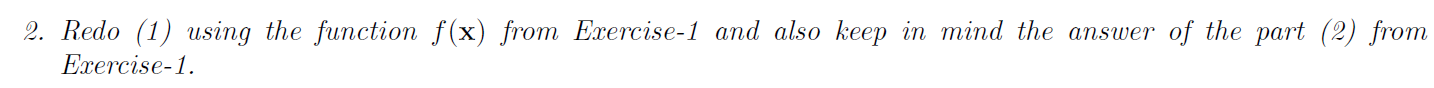

$f(x_1, x_2) = 256(x_2-x_1^2)^2 + (2-x_1)^2$

$$
\nabla f=< 1024 x_1\left(x_1^2-x_2\right)+2 x_1-4,-512 x_1^2+512 x_2>
$$

In [8]:
def gradf(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-1024*(x1**2-x2) - 2*x1 + 4, 512*(x1**2-x2)])

def fx(xk):
  x1  = xk[0]
  x2 = xk[1]
  return (256*((x2-x1**2)**2)) + ((2-x1)**2)

def alphaout(xk, pk, alpha0, rho, gamma):
  alpha = alpha0
  pk = gradf(xk)
  while fx(xk + alpha*pk) > (fx(xk) - gamma*alpha*gradf(xk)@pk):
    alpha = rho*alpha
  return alpha

In [9]:
tau=10**(-10)
x0 = np.array([5,5])


gamma = 0.5
rho = 0.5

alphas= [ 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

iterations = []
minimizerstore = []
minimumstore = []

for alpha0 in alphas:
  print("Current alpha: ", alpha0)
  xk = np.copy(x0)
  count = 0
  pk = gradf(xk)
  alpha = alpha0
  while norm(pk)>tau:
    alpha =  alphaout(xk, pk, alpha, rho, gamma)
    xk = xk + alpha*pk
    pk = gradf(xk)
    count += 1

  iterations.append(count)
  minimizerstore.append(xk)
  minimumstore.append(fx(xk))

Current alpha:  0.9


KeyboardInterrupt: 

In [10]:
iterations

[]

In [11]:
print(minimizerstore)

[]


In [12]:
minimumstore

[]

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

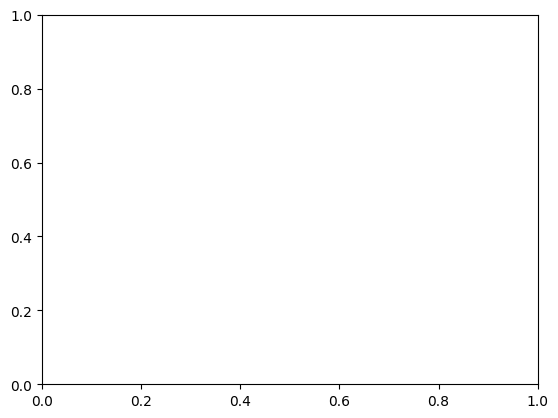

In [13]:
plt.plot(alphas, iterations, marker = 'o', markersize = 3)

For different choices of $\alpha_0$ we see that for $\alpha = 1, 0.5$ the number of iterations are 1, that's because for $\alpha = 0.5$ becomes the optimal exact line search $\alpha$, but if we input 1 in the new alpha calculator that also becomes 0.5 after inexact search, so it results in both of them taking only 1 iteration. As we keep decreasing $\alpha$ after 0.5 the iterations keep increasing.

As for the minimizer (-49, 36) is achieved for all $\alpha_0$ and minimum objective function values is 0 or very close to 0.

Comparing with exact line search we see that, when we used exact line search the total iterations were all 1, here for  $\alpha_0 = 1, 0.5$ we get 1, but for all other cases it is greater than 1. Hence, #iterations(Inexact line search)$\geq$ #Iterations(Exact line search).

### Level Curves for g(x) and trajactery for inexact and Fixed

In [ ]:
tau=10**(-10)
x0 = np.array([100,100])


gamma = 0.5
rho = 0.5

alphas= [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

for alpha0 in alphas:
  print("Current Alpha: ", alpha0)

  #trajactory for inexact
  x = np.linspace(-200, 120, 1000)
  y = np.linspace(-60, 120, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx((X,Y))
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  plt.title(r"For $ \alpha_0 $ : " + str(alpha0)+"  --for inexact")
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  alpha = alpha0
  xcordinates = []
  ycordinates = []
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])
  while norm(pk)>tau:
    alpha =  alphaout(xk, pk, alpha, rho, gamma)
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2, label="In-Exact")
  plt.show()

  #trajactory for exact
  x = np.linspace(-200, 120, 1000)
  y = np.linspace(-60, 120, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx((X,Y))
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  plt.title(r"For $ \alpha_0 $ : " + str(alpha0) + "  --for fixed step")
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  alpha = alpha0
  xcordinates = []
  ycordinates = []
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])
  while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="yellow", markersize = 2, label="Fixed")
  plt.show()

Current Alpha:  0.9


Observing above plots we see that for large alpha values, the fixed step method overshoots and goes beyond the minimizer and then slowly comes back to optimality, while inexact though not perfect goes towards the minimizer appropriately. For smaller alpha values, the fixed and inexact methods approximately same results.